In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf 

2024-01-03 23:14:31.867481: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 23:14:31.867572: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 23:14:31.939039: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 23:14:32.087742: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-03 23:14:33.778620: W tensorflow/compiler/tf2

In [2]:
df = pd.read_csv("telco_customer.csv")
df.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2382,6114-TCFID,Female,0,No,No,29,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Credit card (automatic),39.50,1082.75,No
3225,4931-TRZWN,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,No


In [3]:
df.drop('customerID',inplace=True,axis='columns')
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
def tableData(df):
    for col in df.columns:
        print(f"Col {col} : {df[col].unique()} , dtype: {df[col].dtype}")

tableData(df)

Col gender : ['Female' 'Male'] , dtype: object
Col SeniorCitizen : [0 1] , dtype: int64
Col Partner : ['Yes' 'No'] , dtype: object
Col Dependents : ['No' 'Yes'] , dtype: object
Col tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] , dtype: int64
Col PhoneService : ['No' 'Yes'] , dtype: object
Col MultipleLines : ['No phone service' 'No' 'Yes'] , dtype: object
Col InternetService : ['DSL' 'Fiber optic' 'No'] , dtype: object
Col OnlineSecurity : ['No' 'Yes' 'No internet service'] , dtype: object
Col OnlineBackup : ['Yes' 'No' 'No internet service'] , dtype: object
Col DeviceProtection : ['No' 'Yes' 'No internet service'] , dtype: object
Col TechSupport : ['No' 'Yes' 'No internet service'] , dtype: object
Col StreamingTV : ['No' 'Yes' 'No internet service'] , dtype: object
Col StreamingMovies : ['No' 'Yes' 'N

#### As we can see Col MultipleLines : ['No phone service' 'No' 'Yes']
We have to morph no phone service to just no
it can be achived using .replace() in panda 

In [5]:
df['MultipleLines'].replace('No phone service','No',inplace=True)
df['OnlineSecurity'].replace('No internet service','No',inplace=True)   #Similarly
df['OnlineBackup'].replace('No internet service','No',inplace=True)   #Similarly
df['DeviceProtection'].replace('No internet service','No',inplace=True)   #Similarly
df['TechSupport'].replace('No internet service','No',inplace=True)   #Similarly
df['StreamingTV'].replace('No internet service','No',inplace=True)   #Similarly
df['StreamingMovies'].replace('No internet service','No',inplace=True)   #Similarly

In [6]:
tableData(df)

Col gender : ['Female' 'Male'] , dtype: object
Col SeniorCitizen : [0 1] , dtype: int64
Col Partner : ['Yes' 'No'] , dtype: object
Col Dependents : ['No' 'Yes'] , dtype: object
Col tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] , dtype: int64
Col PhoneService : ['No' 'Yes'] , dtype: object
Col MultipleLines : ['No' 'Yes'] , dtype: object
Col InternetService : ['DSL' 'Fiber optic' 'No'] , dtype: object
Col OnlineSecurity : ['No' 'Yes'] , dtype: object
Col OnlineBackup : ['Yes' 'No'] , dtype: object
Col DeviceProtection : ['No' 'Yes'] , dtype: object
Col TechSupport : ['No' 'Yes'] , dtype: object
Col StreamingTV : ['No' 'Yes'] , dtype: object
Col StreamingMovies : ['No' 'Yes'] , dtype: object
Col Contract : ['Month-to-month' 'One year' 'Two year'] , dtype: object
Col PaperlessBilling : ['Yes' 'No'] , dtyp

##### Look at TotalCharges column, it is in the form of object, it should be float

In [7]:
df['TotalCharges'].astype('float')

ValueError: could not convert string to float: ' '

As we can see some values are ''

In [8]:
x = pd.to_numeric(df['TotalCharges'], errors='coerce')   # errors coerce converts not changeable to nan
x

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
df[x.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### These are the columns where TotalCharges is ' '

In [10]:
df.iloc[488]['TotalCharges']

' '

#### So we can drop these rows

In [11]:
df = df[df['TotalCharges']!=' ']
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [12]:
df['TotalCharges'].isna().unique()

array([False])

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
tableData(df)

Col gender : ['Female' 'Male'] , dtype: object
Col SeniorCitizen : [0 1] , dtype: int64
Col Partner : ['Yes' 'No'] , dtype: object
Col Dependents : ['No' 'Yes'] , dtype: object
Col tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] , dtype: int64
Col PhoneService : ['No' 'Yes'] , dtype: object
Col MultipleLines : ['No' 'Yes'] , dtype: object
Col InternetService : ['DSL' 'Fiber optic' 'No'] , dtype: object
Col OnlineSecurity : ['No' 'Yes'] , dtype: object
Col OnlineBackup : ['Yes' 'No'] , dtype: object
Col DeviceProtection : ['No' 'Yes'] , dtype: object
Col TechSupport : ['No' 'Yes'] , dtype: object
Col StreamingTV : ['No' 'Yes'] , dtype: object
Col StreamingMovies : ['No' 'Yes'] , dtype: object
Col Contract : ['Month-to-month' 'One year' 'Two year'] , dtype: object
Col PaperlessBilling : ['Yes' 'No'] , dtype: o

But better would be to use pd.to_numeric(df.totalCharges)

#### Lets check if any row has na or null value

In [14]:
for col in df.columns:
    naUnique = df[col].isna().unique()
    nuUnique = df[col].isnull().unique()
    print(f"Col: {col} , na: {naUnique} , null: {nuUnique} ")

Col: gender , na: [False] , null: [False] 
Col: SeniorCitizen , na: [False] , null: [False] 
Col: Partner , na: [False] , null: [False] 
Col: Dependents , na: [False] , null: [False] 
Col: tenure , na: [False] , null: [False] 
Col: PhoneService , na: [False] , null: [False] 
Col: MultipleLines , na: [False] , null: [False] 
Col: InternetService , na: [False] , null: [False] 
Col: OnlineSecurity , na: [False] , null: [False] 
Col: OnlineBackup , na: [False] , null: [False] 
Col: DeviceProtection , na: [False] , null: [False] 
Col: TechSupport , na: [False] , null: [False] 
Col: StreamingTV , na: [False] , null: [False] 
Col: StreamingMovies , na: [False] , null: [False] 
Col: Contract , na: [False] , null: [False] 
Col: PaperlessBilling , na: [False] , null: [False] 
Col: PaymentMethod , na: [False] , null: [False] 
Col: MonthlyCharges , na: [False] , null: [False] 
Col: TotalCharges , na: [False] , null: [False] 
Col: Churn , na: [False] , null: [False] 


### Now data is clean we should scale the data, encode and choose test 

In [15]:
tableData(df)

Col gender : ['Female' 'Male'] , dtype: object
Col SeniorCitizen : [0 1] , dtype: int64
Col Partner : ['Yes' 'No'] , dtype: object
Col Dependents : ['No' 'Yes'] , dtype: object
Col tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] , dtype: int64
Col PhoneService : ['No' 'Yes'] , dtype: object
Col MultipleLines : ['No' 'Yes'] , dtype: object
Col InternetService : ['DSL' 'Fiber optic' 'No'] , dtype: object
Col OnlineSecurity : ['No' 'Yes'] , dtype: object
Col OnlineBackup : ['Yes' 'No'] , dtype: object
Col DeviceProtection : ['No' 'Yes'] , dtype: object
Col TechSupport : ['No' 'Yes'] , dtype: object
Col StreamingTV : ['No' 'Yes'] , dtype: object
Col StreamingMovies : ['No' 'Yes'] , dtype: object
Col Contract : ['Month-to-month' 'One year' 'Two year'] , dtype: object
Col PaperlessBilling : ['Yes' 'No'] , dtype: o

In [16]:
df['gender'].replace({'Female':0, 'Male': 1},inplace=True)
df['Partner'].replace({'Yes':1, 'No':0},inplace=True)
df['Dependents'].replace({'Yes':1, 'No':0},inplace=True)
df['PhoneService'].replace({'Yes':1, 'No':0},inplace=True)
df['MultipleLines'].replace({'Yes':1, 'No':0},inplace=True)
df['OnlineSecurity'].replace({'Yes':1, 'No':0},inplace=True)
df['OnlineBackup'].replace({'Yes':1, 'No':0},inplace=True)
df['DeviceProtection'].replace({'Yes':1, 'No':0},inplace=True)
df['TechSupport'].replace({'Yes':1, 'No':0},inplace=True)
df['StreamingTV'].replace({'Yes':1, 'No':0},inplace=True)
df['StreamingMovies'].replace({'Yes':1, 'No':0},inplace=True)
df['PaperlessBilling'].replace({'Yes':1, 'No':0},inplace=True)
df['Churn'].replace({'Yes':1, 'No':0},inplace=True)

In [17]:
tableData(df)

Col gender : [0 1] , dtype: int64
Col SeniorCitizen : [0 1] , dtype: int64
Col Partner : [1 0] , dtype: int64
Col Dependents : [0 1] , dtype: int64
Col tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] , dtype: int64
Col PhoneService : [0 1] , dtype: int64
Col MultipleLines : [0 1] , dtype: int64
Col InternetService : ['DSL' 'Fiber optic' 'No'] , dtype: object
Col OnlineSecurity : [0 1] , dtype: int64
Col OnlineBackup : [1 0] , dtype: int64
Col DeviceProtection : [0 1] , dtype: int64
Col TechSupport : [0 1] , dtype: int64
Col StreamingTV : [0 1] , dtype: int64
Col StreamingMovies : [0 1] , dtype: int64
Col Contract : ['Month-to-month' 'One year' 'Two year'] , dtype: object
Col PaperlessBilling : [1 0] , dtype: int64
Col PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit car

#### Before morphing data to machine format, lets just try to derive some meaning out of it

Text(0, 0.5, 'How many people')

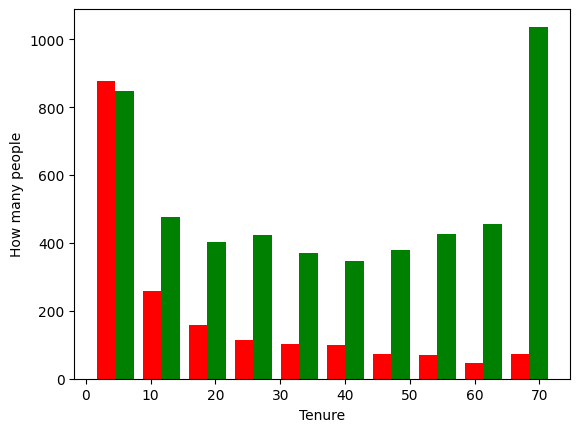

In [18]:
Left = df[df['Churn']==1]
Stayed = df[df['Churn']==0]

plt.hist([Left.tenure,Stayed.tenure],color=['red','green'])
plt.xlabel('Tenure')
plt.ylabel('How many people')


Text(0, 0.5, 'Number of people')

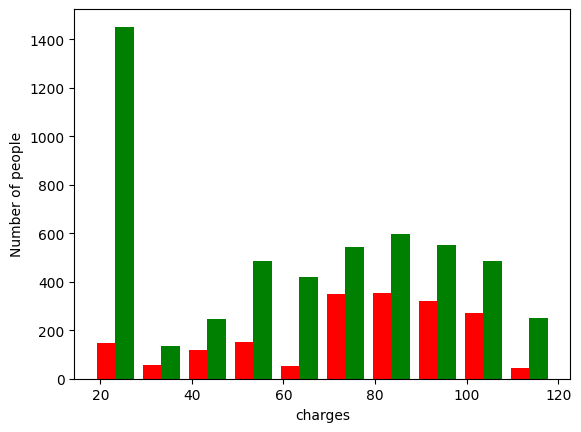

In [19]:
plt.hist([Left.MonthlyCharges,Stayed.MonthlyCharges],color=['red','green'])
plt.xlabel('charges')
plt.ylabel('Number of people')

Text(0, 0.5, 'Number of people')

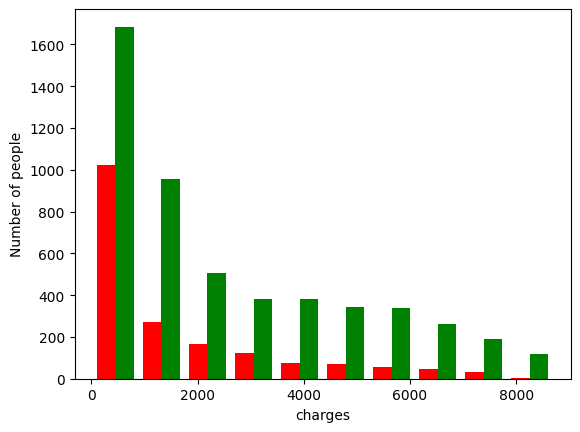

In [20]:
plt.hist([Left.TotalCharges,Stayed.TotalCharges],color=['red','green'])
plt.xlabel('charges')
plt.ylabel('Number of people')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
MmScaler = MinMaxScaler()
df1 = df
df1[['tenure','MonthlyCharges','TotalCharges']] = MmScaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])
tableData(df1)

Col gender : [0 1] , dtype: int64
Col SeniorCitizen : [0 1] , dtype: int64
Col Partner : [1 0] , dtype: int64
Col Dependents : [0 1] , dtype: int64
Col tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127] , dtype: float64
Col PhoneService : 

In [23]:
encodeCols = ['InternetService','Contract','PaymentMethod']
OneHotEncoded = pd.get_dummies(df[encodeCols],dtype='int')
OneHotEncoded

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,1,0,0,0,0,1
7039,0,1,0,0,1,0,0,1,0,0
7040,1,0,0,1,0,0,0,0,1,0
7041,0,1,0,1,0,0,0,0,0,1


In [24]:
df2 = pd.concat([df,OneHotEncoded],axis='columns')
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3234,0,0,1,1,0.323944,1,0,No,0,0,...,0,0,1,0,0,1,0,0,0,1
6417,0,1,1,0,0.704225,1,1,Fiber optic,1,0,...,0,1,0,1,0,0,0,0,1,0


In [25]:
df2.drop(encodeCols,axis='columns',inplace=True)
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
215,0,0,1,0,0.788732,0,0,1,1,1,...,1,0,0,1,0,0,1,0,0,0
733,0,0,1,1,1.000000,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0


In [26]:
X = df2.drop(['Churn'],axis='columns')
Y = df2[['Churn']]
X.columns , '\n' , Y.columns

(Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
        'InternetService_DSL', 'InternetService_Fiber optic',
        'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
        'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
        'PaymentMethod_Credit card (automatic)',
        'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
       dtype='object'),
 '\n',
 Index(['Churn'], dtype='object'))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625, 1), (1407, 1))

In [28]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

2024-01-03 23:18:17.592740: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-03 23:18:17.815624: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-03 23:18:17.815711: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-03 23:18:17.819097: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-03 23:18:17.819196: I external/local_xla/xla/stream_executor

In [29]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=200)

Epoch 1/200


2024-01-03 23:18:20.623872: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f34f83f4310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-03 23:18:20.623939: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2024-01-03 23:18:20.644376: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-03 23:18:20.702301: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1704304100.810234    1653 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


176/176 [==============================] - 4s 12ms/step - loss: 0.5104 - accuracy: 0.7429
Epoch 2/200
176/176 [==============================] - 2s 11ms/step - loss: 0.4326 - accuracy: 0.7925
Epoch 3/200
176/176 [==============================] - 2s 12ms/step - loss: 0.4219 - accuracy: 0.7986
Epoch 4/200
176/176 [==============================] - 2s 12ms/step - loss: 0.4176 - accuracy: 0.8016
Epoch 5/200
176/176 [==============================] - 2s 11ms/step - loss: 0.4149 - accuracy: 0.8041
Epoch 6/200
176/176 [==============================] - 2s 11ms/step - loss: 0.4134 - accuracy: 0.8044
Epoch 7/200
176/176 [==============================] - 2s 11ms/step - loss: 0.4117 - accuracy: 0.8055
Epoch 8/200
176/176 [==============================] - 2s 10ms/step - loss: 0.4100 - accuracy: 0.8062
Epoch 9/200
176/176 [==============================] - 2s 11ms/step - loss: 0.4096 - accuracy: 0.8062
Epoch 10/200
176/176 [==============================] - 2s 12ms/step - loss: 0.4083 - accuracy

In [30]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 7ms/step - loss: 0.4689 - accuracy: 0.7811


[0.4689212739467621, 0.7810945510864258]

In [31]:
X_test.shape , X.iloc[0].shape

((1407, 26), (26,))

So we need to change the shape to find the answer

In [32]:
x_find = np.array([X_test.iloc[3]])
x_find.shape

(1, 26)

In [33]:
model.predict(x_find)

1/1 [==============================] - 0s 108ms/step


array([[0.7145842]], dtype=float32)

In [34]:
y_test.iloc[3]

Churn    1
Name: 64, dtype: int64

In [36]:
y_pred = model.predict(X_test)
y_pred

44/44 [==============================] - 0s 4ms/step


array([[0.2818588 ],
       [0.3716385 ],
       [0.00673221],
       ...,
       [0.74722826],
       [0.66183317],
       [0.73818773]], dtype=float32)

In [37]:
y_pred5 = y_pred[0:5]
y_pred5 = [1 if x>=0.5 else 0 for x in y_pred5]
y_pred5

[0, 0, 0, 1, 1]

In [38]:
y_test[0:5]

,Churn
2660,0
744,0
5579,1
64,1
3287,1


In [45]:
y_pred_fin = [1 if x>=0.5 else 0 for x in y_pred ]
type(y_pred_fin[0])

int

In [46]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_fin))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.56      0.60       408

    accuracy                           0.78      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.77      0.78      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

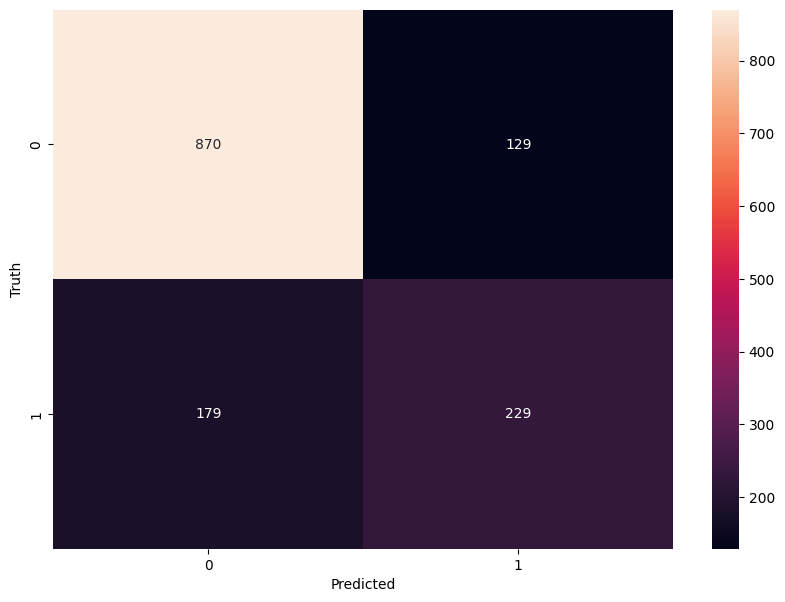

In [48]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_fin)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
y_test.shape

(1407, 1)

Accuracy

In [57]:
round((870+229)/(870+229+129+179),2)    # Diagonal/Total

0.78

Precision for class 0

In [58]:
round(870/(870+179),2)      # Correct(0)/TotalPredicted(0)

0.83

Precision for class 1

In [59]:
round(229/(229+129),2)

0.64

Recall for class 0

In [60]:
round(870/(870+129),2)      # Correct(0)/TotalActual(0)

0.87

Recall for class 1

In [61]:
round(229/(229+179),2)

0.56